### Model for prediction outcome on credit card applications

In this notebook, we are going to create a supervised machine learning model to predict the outcome of a credit card application given a set of features. 

In [150]:
# Import modules 
import numpy as np 
import pandas as pd

#### 1. Method of dropping rows with missing values
We reload the original credit card dataset and clean the missing data by simply dropping the concerning rows.  

In [151]:
cc_original = pd.read_csv('../datasets/crx.data_named.csv', index_col=[0])
cc_original.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefaulter,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [152]:
cc_original.describe(include='all')

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefaulter,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [199]:
# Load helper functions from src/utils-*-*.py to run on jupyter-notebook
%run ../src/utils-gather-assess.py
%run ../src/utils-explore-clean.py
%run ../src/utils-models.py

In [154]:
cc_drop = cc_original.copy()

# Replace all ? with Nan values
for icol in cc_drop.columns:
    replace_feature_missingvalues(cc_drop, icol, '?', np.NaN)

In [155]:
# Drop all rows that are Nan
cc_drop.dropna(inplace=True)

# change datatype of Age feature
change_feature_datatype(cc_drop, 'Age', float)

 Details of column: Age
        - dtype(o): object
        - dtype(n): float64


In [156]:
cc_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          653 non-null    object 
 1   Age             653 non-null    float64
 2   Debt            653 non-null    float64
 3   Married         653 non-null    object 
 4   BankCustomer    653 non-null    object 
 5   EducationLevel  653 non-null    object 
 6   Ethnicity       653 non-null    object 
 7   YearsEmployed   653 non-null    float64
 8   PriorDefaulter  653 non-null    object 
 9   Employed        653 non-null    object 
 10  CreditScore     653 non-null    int64  
 11  DriversLicense  653 non-null    object 
 12  Citizen         653 non-null    object 
 13  ZipCode         653 non-null    object 
 14  Income          653 non-null    int64  
 15  Approved        653 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.7+ KB


After dropping rows with missing values, we end up with 653 rows/instances for 15 features and 1 target variable.  

In [157]:
cc_drop.to_csv('../datasets/crx.data_drop.csv')

In [158]:
show_files_datasets('../datasets')

 datasets/
       - crx.data
       - crx.names
       - crx.data_named.csv
       - crx.data_drop.csv
       - crx.data_clean.csv


Credit card data is now loaded into a `cc_drop` dataframe. We now split the combined dataframe into `features` and `target` dataframe by performing **one_hot_encoding** on categorical variables in `features` dataframe.   

In [159]:
# Split dataframe into num_df, cat_df and target_df
cc_drop_num, cc_drop_cat, cc_drop_target = split_dataframe_datatypes(cc_drop, 'Approved')
cc_drop_features_combined = pd.concat([cc_drop_num, cc_drop_cat], axis=1)

/home/naneen/.local/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [160]:
# Perform Ordinal Encoding on Categorical features
print('Before:\n',cc_drop_cat.head())
cc_drop_cat_nparray = apply_encoder_ordinal(cc_drop_cat)
#cc_drop_cat_nparray = apply_encoder_one_hot(cc_drop_cat)
print('\nAfter:\n',cc_drop_cat_nparray.shape, cc_drop_cat_nparray)

Before:
   Gender Married BankCustomer EducationLevel Ethnicity PriorDefaulter  \
0      b       u            g              w         v              t   
1      a       u            g              q         h              t   
2      a       u            g              q         h              t   
3      b       u            g              w         v              t   
4      b       u            g              w         v              t   

  Employed DriversLicense Citizen ZipCode  
0        t              f       g   00202  
1        t              f       g   00043  
2        f              f       g   00280  
3        t              t       g   00100  
4        f              f       s   00120  

After:
 (653, 10) [[ 1.  1.  0. ...  0.  0. 68.]
 [ 0.  1.  0. ...  0.  0. 11.]
 [ 0.  1.  0. ...  0.  0. 94.]
 ...
 [ 0.  2.  2. ...  1.  0. 67.]
 [ 1.  1.  0. ...  0.  0. 94.]
 [ 1.  1.  0. ...  1.  0.  0.]]


In [161]:
# Convert df into numpy array --> Numerical variables
print('Before:\n',cc_drop_num.head())
cc_drop_num_nparray = cc_drop_num.to_numpy()
print('\nAfter:\n',cc_drop_num_nparray.shape, cc_drop_num_nparray)

Before:
      Age   Debt  YearsEmployed  CreditScore  Income
0  30.83  0.000           1.25            1       0
1  58.67  4.460           3.04            6     560
2  24.50  0.500           1.50            0     824
3  27.83  1.540           3.75            5       3
4  20.17  5.625           1.71            0       0

After:
 (653, 5) [[3.083e+01 0.000e+00 1.250e+00 1.000e+00 0.000e+00]
 [5.867e+01 4.460e+00 3.040e+00 6.000e+00 5.600e+02]
 [2.450e+01 5.000e-01 1.500e+00 0.000e+00 8.240e+02]
 ...
 [2.525e+01 1.350e+01 2.000e+00 1.000e+00 1.000e+00]
 [1.792e+01 2.050e-01 4.000e-02 0.000e+00 7.500e+02]
 [3.500e+01 3.375e+00 8.290e+00 0.000e+00 0.000e+00]]


Often we (atleast me!) forgets about the categorical target variable. This may result in model giving Nan results on the metrics you are tracking. Let's not do that this time around! 

In [162]:
# Perform Label Encoding on Categorical target variable
print('Before:\n', cc_drop_target['Approved'])
cc_drop_target_nparray = apply_encoder_label(cc_drop_target['Approved'])
print('\nAfter:\n',cc_drop_target_nparray)

Before:
 0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: Approved, Length: 653, dtype: object

After:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 

In [163]:
# Combined features np.array
cc_drop_combined_nparray = combine_two_nparrays(cc_drop_cat_nparray, cc_drop_num_nparray)
cc_drop_combined_nparray.shape

(653, 15)

In [164]:
#cc_drop_combined_scaled = apply_standard_scaling(cc_drop_combined_nparray)
cc_drop_combined_scaled = cc_drop_combined_nparray

Let's sneak into the shapes of dataframes that are now ready to go into supervised ML model.

In [165]:
# Check size of features npa
cc_drop_combined_nparray.shape

(653, 15)

In [166]:
# Check size of target npa
cc_drop_target_nparray.shape

(653,)

In [167]:
# Split dataframe into training and testing datasets
ftrain, ftest, ttrain, ttest = get_train_test_dfs(cc_drop_combined_scaled, cc_drop_target_nparray, 0.7)

In [168]:
# Looking at shapes of training and testing datasets
print(' Train datatset: \n Shape of features:',ftrain.shape, '==> Shape of target:',ttrain.shape)

print('\n Test_ datatset: \n Shape of features:',ftest.shape, '==> Shape of target:',ttest.shape)

 Train datatset: 
 Shape of features: (457, 15) ==> Shape of target: (457,)

 Test_ datatset: 
 Shape of features: (196, 15) ==> Shape of target: (196,)


Before starting to build a ML model, we first initialize model list and dicts.

***

In [225]:
# Set the no. of processor 
nproc = 2

In [226]:
# initialize models list
models = []

# get basic classification models
model_set1 = get_classifiers_basic('all', False)

# Update models list
models.extend(model_set1)

# List of models to perform cross-validation on.
print(' List of models for cross-validation:\n')
for imodel, model in enumerate(models):
    print(' {} {}'.format(imodel,model))

 List of models for cross-validation:

 0 LogisticRegression()
 1 SVC()
 2 RandomForestClassifier()


In [227]:
# Cross validation to predict feature importance  
models_scores = {}
for model in models:
    scores = train_model(model, ftrain, ttrain, nproc, 3, False)
    models_scores[model] = scores

In [228]:
#print_models_metrics_scores(models_scores)

In [229]:
# Print models-metrics-scores in a table
pprint_models_metrics_scores(models_scores)



| Model                | fit_time     | score_time   | test_accs    | test_f1_s    | test_rocs    |
| -------------------- | ------------ | ------------ | ------------ | ------------ | ------------ |
| LogisticRegression() |   0.06318847 |   0.00807015 |    0.8293487 |   0.84800212 |   0.89110637 |
| SVC()                |   0.00544707 |   0.00656327 |    0.6585684 |   0.74696658 |   0.68442674 |
| RandomForestClassifi |   0.22017932 |   0.02792652 |   0.87087203 |   0.88246972 |   0.93674769 |


This is great! We have now created a readable table for our model-metrics-scores.  This makes it so much easier to visually interpret the models, their metrics and scores.

In [230]:
# Get the best of models
model = get_best_model(models_scores, 'test_accs')
print ('\n Best model with max.ACCURACY is:', model)


 Best model with max.ACCURACY is: RandomForestClassifier()


In [231]:
# Get & Set hyper-parameter for convergence
hparams = model.get_params()
print(hparams)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Let's consider the best model with min.MSE for finalizing the features.

In [232]:
# train the model on the dataset
model.fit(ftrain, ttrain)
prediction = model.predict(ftest)

print('Train Score:', model.score(ftrain, ttrain))
print('Test_ Score:',model.score(ftest, ttest))

Train Score: 1.0
Test_ Score: 0.8418367346938775


For predicting Credit Card Applications outcome, our `RandomForestClassifier` ensemble model performs good with ~84% accuracy. It is always worth trying out different possibilities to improve the overall performance of the model. But, here, we conclude this study by plotting features in the descending order of their relevance.  

***

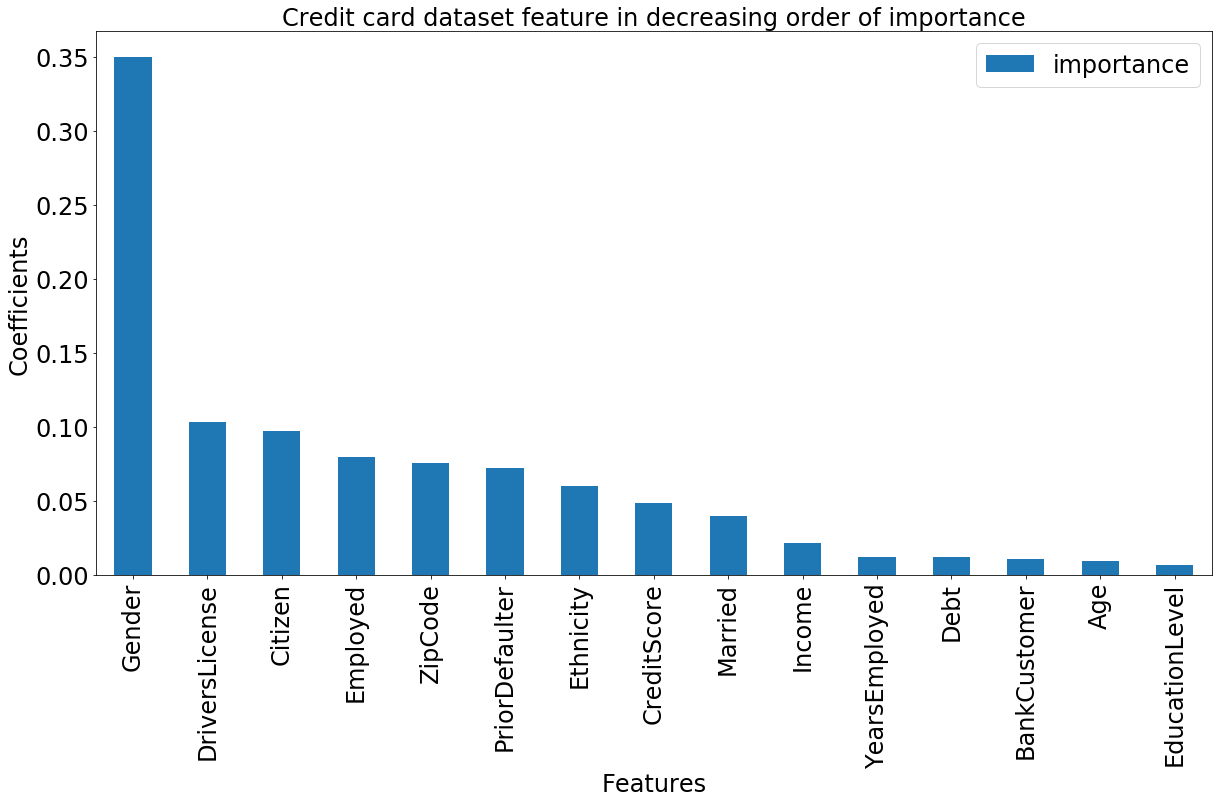

In [240]:
#store feature importances
importances = model.feature_importances_

feature_importances = pd.DataFrame({'feature':cc_drop_features_combined.columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

#set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)

#create plot
feature_importances[0:25].plot.bar(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.xlabel('Features', fontsize=24)
plt.ylabel('Coefficients', fontsize=24)
plt.title('Credit card dataset feature in decreasing order of importance')
plt.show()

Looking at the above figure, it can be concluded that credit cards are approved based on the features `Gender`, `DriversLicense`, `Citizen`, `Employed`, `ZipCode`, `PriorDefaulter`. Results here definitely raises questions on the model. This means, we can get started with the iterative analysis process to build a much better ML model. This part, we will leave it for the future developments.     